In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load SNP data into a NumPy array
data = pd.read_csv('Data/DataS1_freq.txt.gz', sep='\t', header=None, compression='gzip')


In [23]:
round(10/3, 2)

3.33

Cluster labels: {'Czech Republic': 3, 'Macedonia': 14, 'Portugal': 13, 'The Netherlands': 3, 'Kazakhstan': 9, 'Spain': 2, 'Poland': 8, 'Latvia': 8, 'Germany': 12, 'Serbia': 10, 'Romania': 10, 'Greece': 7, 'Iran': 11, 'Russia': 6, 'Lithuania': 8, 'Croatia': 4, 'Austria': 4, 'France': 4, 'Italy': 1, 'Bulgaria': 7, 'Israel': 14, 'Jordan': 11, 'Sweden': 8, 'Estonia': 15, 'Armenia': 9, 'United Kingdom': 3, 'Turkey': 11, 'Denmark': 8, 'Ukraine': 12, 'Hungary': 1}


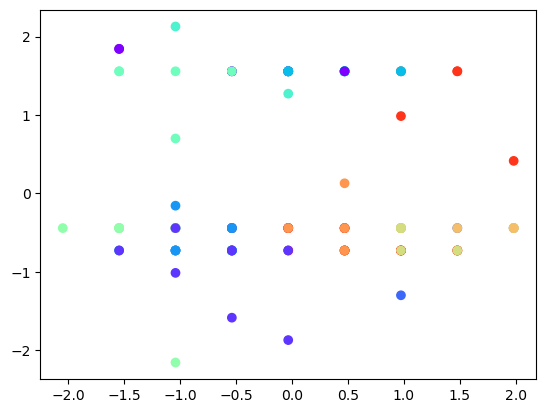

In [54]:

# Scale the data
scaler = StandardScaler()

# from column 1 to the end
data2= scaler.fit_transform(data.iloc[:, 1:])

# Choose the number of clusters
k = 16
# Initialize K centroids randomly
kmeans = KMeans(n_clusters=k, init='random', n_init=10)

# Fit the K-means model to the data
kmeans.fit(data2)

# Get the cluster assignments for each SNP
labels = kmeans.labels_

# Get the cluster centers
centroids = kmeans.cluster_centers_

# Get the sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_

# from first column of data get the country names and store in a list
country = data.iloc[:, 0].to_list()

# create a dictionary with country as key and labels as value
country_labels = dict(zip(country, labels))


# Print the results
print('Cluster labels: %s' % country_labels )
# print('Cluster centroids: %s' % centroids)
# print('Sum of squared distances: %s' % inertia)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(data2[:, 0], data2[:, 1], c=labels, cmap='rainbow')
plt.show()


In [43]:
dataframe = pd.DataFrame(columns=['country', 'date', 'cluster'])

for key, value in country_labels.items():
    a= key.split('_')
    b= a[0]
    c= a[1]
    d= value
    e= f'{b}\t{c}\t{d}'
    ## add to a dataframe
    dataframe = dataframe.append({'country': b, 'date': c, 'cluster': d}, ignore_index=True)
    
# split country name if find capital letter in the middle of the string
# and add a space before the capital letter
dataframe['country'] = dataframe['country'].str.replace(r'(\w)([A-Z])', r'\1 \2')
dataframe.to_csv('Data/DataS1_freq_labels.csv', sep='\t', index=False)



    
    

IndexError: list index out of range

In [2]:
data3=data.iloc[:, 1:]

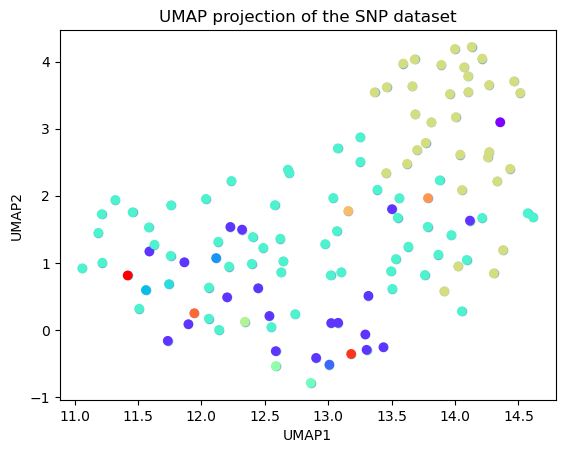

In [8]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Read in your dataset as a pandas dataframe


# Apply UMAP to the dataset
reducer = umap.UMAP()
df_umap = reducer.fit_transform(data3)

# Visualize the UMAP results
plt.scatter(df_umap[:, 0], df_umap[:, 1], alpha=0.5)
# color the points by their cluster assignment
plt.scatter(df_umap[:, 0], df_umap[:, 1], c=labels, cmap='rainbow')

# add a legend
plt.legend(labels, loc='upper left')

# add a annotation very small font size and close to the point
for i, txt in enumerate(country):
    plt.annotate(txt, (df_umap[i, 0], df_umap[i, 1]), fontsize=6, xytext=(5, 2), textcoords='offset points')



# add a title
plt.title('UMAP projection of the SNP dataset')
# add x and y labels
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')





plt.show()


# spherical or not

In [27]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

def is_data_spherical(X):
    # Compute the centroid of the data
    centroid = np.mean(X, axis=0)

    # Calculate the Euclidean distances from each point to the centroid
    distances = euclidean_distances(X, [centroid]).ravel()

    # Compute the mean and standard deviation of the distances
    mean_distance = np.mean(distances)
    std_distance = np.std(distances)

    # Determine if the data is spherical
    if std_distance / mean_distance < 0.5:
        return True
    else:
        return False

print(is_data_spherical(data3))

True


/home/adr/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adr/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adr/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adr/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adr/.local/lib/python3.10/site-package

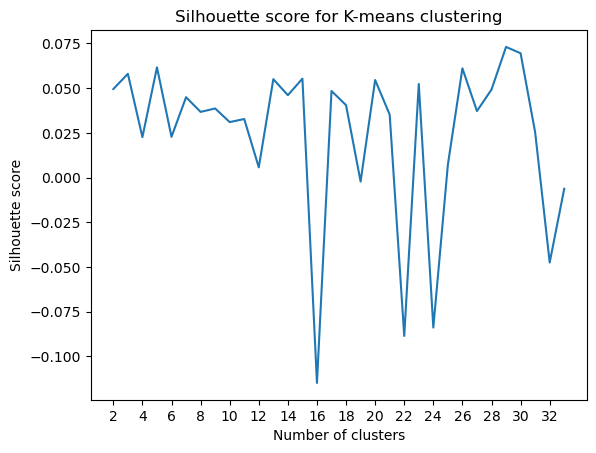

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def plot_silhouette_score(X, k_min=1, k_max=33):
    # Create a range of K values
    k_range = range(k_min, k_max+1)

    # Create an empty list to store the silhouette scores
    silhouette_scores = []

    # Loop through the range of K values and calculate the silhouette score for each value
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

    # Plot the silhouette scores for each K value
    plt.plot(k_range, silhouette_scores)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score for K-means clustering')
    plt.xticks(np.arange(k_min, k_max+1, step=2))
    plt.show()
    

plot_silhouette_score(data3, k_min=2, k_max=33)



In [1]:
import pandas as pd

newdf= pd.read_csv('Data/DataS1_freq_labels.csv', sep='\t')
newdf=pd.DataFrame(newdf)


In [2]:
newdf

,country,date,cluster
0,Czech Republic,4,8
1,Czech Republic,6,8
2,Czech Republic,5,8
3,Czech Republic,3,8
4,Macedonia,7,3
...,...,...,...
114,Hungary,4,3
115,Hungary,6,3
116,Hungary,5,3
117,Hungary,7,3


In [4]:
newdf['cluster'].value_counts()

3     48
2     32
8     28
13     1
7      1
1      1
12     1
10     1
9      1
5      1
0      1
11     1
4      1
6      1
Name: cluster, dtype: int64

In [6]:
import pandas as pd
from geopy.geocoders import Nominatim

# Load your dataset (assuming it's a CSV file)
data = pd.read_csv('Data/DataS1_freq_labels.csv', sep='\t')

# Initialize a geolocator object
geolocator = Nominatim(user_agent='my-app')

# Define a function to get the latitude and longitude of a country
def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply the function to the 'country' column and create a new DataFrame
coordinates = data['country'].apply(get_coordinates).apply(pd.Series)
coordinates.columns = ['latitude', 'longitude']
df = pd.concat([data, coordinates], axis=1)

# Print the first few rows of the new DataFrame
print(df)


            country  date  cluster   latitude  longitude
0    Czech Republic     4        8  49.743905  15.338106
1    Czech Republic     6        8  49.743905  15.338106
2    Czech Republic     5        8  49.743905  15.338106
3    Czech Republic     3        8  49.743905  15.338106
4         Macedonia     7        3  41.617121  21.716839
..              ...   ...      ...        ...        ...
114         Hungary     4        3  47.181759  19.506094
115         Hungary     6        3  47.181759  19.506094
116         Hungary     5        3  47.181759  19.506094
117         Hungary     7        3  47.181759  19.506094
118         Hungary     2        8  47.181759  19.506094

[119 rows x 5 columns]


In [ ]:
df.to_csv('Data/DataS1_freq_labels (curated).csv', sep='\t', index=False)

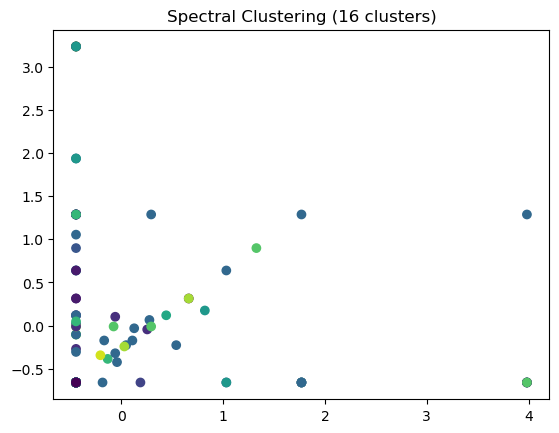

In [5]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(data3)

# Perform spectral clustering
n_clusters = 16 # Number of clusters
clustering = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors").fit(X)

# Visualize the clustering result
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.title("Spectral Clustering ({} clusters)".format(n_clusters))
plt.show()


In [10]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

# Load your dataset into a Pandas dataframe or NumPy array
X = data3

# Normalize or standardize your dataset, if needed
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose the clustering algorithms you want to use
clustering_algorithms = [
    KMeans(n_clusters=2),
    DBSCAN(),
    AgglomerativeClustering(n_clusters=2),
 
]

# Set up a dictionary to store the results and evaluation metrics for each algorithm
results = {}

# Iterate over each clustering algorithm and evaluate its performance
for algorithm in clustering_algorithms:
    # Fit the model to your data and predict cluster labels
    algorithm.fit(X)
    labels = algorithm.labels_
    
    # Compute one or more clustering evaluation metrics
    silhouette = silhouette_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    
    # Store the results and evaluation metrics for this algorithm in the dictionary
    results[str(algorithm)] = {'labels': labels, 'silhouette': silhouette, 'ch_index': ch_index, 'db_index': db_index}
    
# Print the results for each algorithm
for algorithm, result in results.items():
    print(algorithm)
    print('Labels:', result['labels'])
    print('Silhouette:', result['silhouette'])
    print('Calinski-Harabasz Index:', result['ch_index'])
    print('Davies-Bouldin Index:', result['db_index'])


/home/adr/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)